<a href="https://colab.research.google.com/github/MaxGama/DataScience/blob/master/BREXIT_Um_olhar_da_Ciencia_de_dados(Dados_AirBnB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BREXIT: Um olhar da ciência de dados**
O termo **Brexit** quer dizer “British exit”, ou seja, saída britânica do bloco.

## **Um pouco da história**
No ano de 2016, o Reino Unido foi dividido em um intenso debate sobre o referendo em que havia a  proposta do Brexit. O partido conservador defendia a proposta de que os recursos passados para a UE, poderiam ser utilizados para políticas que impediriam a entrada de imigrantes no país. Por outro lado, as forças políticas favoráveis à continuação do país no bloco, afirmavam que o acordo trazia muitos benefícios à população e que não seria interessante perder essas vantagens.
Foi feito um referendo e 52% aprovaram o BREXIT.
Após 4 longos anos de intensos debates e 3 primeiros-ministros (David Cameron, Theresa May e Boris Johnson (atual)), finalmente em 31 de Janeiro de 2020, o Reino Unido não faz mais parte a União Européia.

## **Uma análise desse fato sob a ótica do Data Science**

O ponto que mais impacta todo esse processo é sem sombra de dúvidas o Econômico. Com base nisso vamos analisar dados coletados do site [AirBnb](https://https://www.airbnb.com.br/) e compará-los.
Com base na análise dos dados coletado vamos aplicar métodos e saber qual será o impacto econômico essa saída.

## **O AirBnB**
Considerado a maior empresa hoteleira da atualidade. Mesmo sem possuir nenhum hotel!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

# **O Objetivo do Projeto**
Iremos analisar dados das acomodações extraídos do AirBnb e compará-los entre si, utilizaremos as Cidades de Londres, Paris, Madri e Lisboa. Para traçar um paralelo dos preços médios nessas Cidades.
Ao final mostraremos a localização das acomodações com reviews da Cidade de Londres.


In [0]:
#Importar as Bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import locale
import folium
from folium import plugins
from folium.features import DivIcon
from folium.plugins import HeatMap

In [0]:
#Carregar os Arquivos CSV
df_londres = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2019-11-05/visualisations/listings.csv")
df_paris = pd.read_csv ("http://data.insideairbnb.com/france/ile-de-france/paris/2019-11-07/visualisations/listings.csv")
df_madri = pd.read_csv ("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2019-11-09/visualisations/listings.csv")
df_lisboa = pd.read_csv ("http://data.insideairbnb.com/portugal/lisbon/lisbon/2019-11-28/visualisations/listings.csv")

# **Análise dos Dados**
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


### **Dicionário das variáveis**

**id** - número de id gerado para identificar o imóvel

**name** - nome da propriedade anunciada

**host_id** - número de id do proprietário (anfitrião) da 
propriedade

**host_name** - Nome do anfitrião

**neighbourhood_group** - esta coluna não contém nenhum valor válido

**neighbourhood** - nome do bairro

**latitude** - coordenada da latitude da propriedade

**longitude** - coordenada da longitude da propriedade

**room_type** - informa o tipo de quarto que é oferecido

**price** - preço para alugar o imóvel

**minimum_nights** - quantidade mínima de noites para reservar

**number_of_reviews** - número de reviews que a propriedade possui

**last_review** - data do último review

**reviews_per_month** - quantidade de reviews por mês

**calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião

**availability_365** - número de dias de disponibilidade dentro de 365 dias

*Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.*

In [0]:
df_londres.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2,336
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2,365
2,90700,Sunny Notting Hill flat & terrace,491286,Chil,NaN,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2,268
3,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.73,1,158
4,92399,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366,Andrea & Mark,NaN,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.04,2,336


## **Q1. Qual a porcentagem de valores ausentes no dataset?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
As variáveis reviews_per_month e last_review possuem valores nulos em 23.52% das linhas.
As variáveis name e host_name têm aproximadamente 0,2% dos valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
a = (df_londres.isnull().sum() / df_londres.shape[0]).sort_values(ascending=False) 
df_formatado = pd.DataFrame(a)
df_formatado.style.format("{:.2%}")

,0
neighbourhood_group,100.00%
reviews_per_month,23.52%
last_review,23.52%
name,0.03%
host_name,0.01%
availability_365,0.00%
calculated_host_listings_count,0.00%
number_of_reviews,0.00%
minimum_nights,0.00%
price,0.00%


In [0]:
# Excluir a coluna 'neighbourhood_group', que está 100% vazia
df_londres.drop(labels='neighbourhood_group', axis=1, inplace=True)

In [0]:
# Os registros que possuem valores vazios também serão eliminados
df_londres.dropna(how='any', inplace=True)

## **Q2. Qual a média de preços das acomodações?**

A maneira que utilizamos para descobri esse dados foi criando um novo DataFrame, com as colunas Tipo de Acomodação e Preço.
Em seguida extraímos desse universo os percentuais de cada tipo de acomodação no universo dos dados.

**Na Cidade de Londres a disposição foi:**

* Entire home/apt	56.71%
* Private room	41.33%
* Hotel room	1.34%
* Shared room	0.62%

O comportamento dos viajantes em londres, segundo os dados é que os imóveis (casa/apartamento) inteiros, são os mais procurados. Em oposição aos Quartos Compartilhados, que são os menos procurados.





In [0]:
# Criar um DataFrame somente com as colunas 'Room_Type e 'Price'
df_uk = df_londres.copy()
df_uk = df_uk[['room_type','price']]
df_uk.head()

,room_type,price
0,Entire home/apt,88
1,Private room,65
2,Entire home/apt,105
3,Entire home/apt,100
4,Private room,77


In [0]:
# Porcentagem de cada tipo de imóvel disponível
Total = df_londres.room_type.value_counts() / df_londres.shape[0]
df_formatado = pd.DataFrame(Total)
df_formatado.style.format("{:.2%}")

,room_type
Entire home/apt,56.71%
Private room,41.33%
Hotel room,1.34%
Shared room,0.62%


# **Q3. Qual o total de tipos de acomodações disponíveis?**

Com base nas preferências dos viajantes para a Cidade de Londres, vamos então analisar as ofertas de cada um dos tipos de acomodações.

* Hotel room         201.110472
* Entire home/apt    152.845026
* Private room        52.325510
* Shared room         39.790123

Como podemos analisar os Quartos de Hoteis são a maioria no universo de dados, seguidos dos imóveis inteiros. Quartos compartilhados são os menos procurados e também os menos oferecidos.

In [0]:
# Média das acomodações disponíveis
df_uk.groupby(['room_type']).price.mean().sort_values(ascending=False)


room_type
Hotel room         201.110472
Entire home/apt    152.845026
Private room        52.325510
Shared room         39.790123
Name: price, dtype: float64

# **Fase de preparação dos Dados**
Iremos usar um comparativo entre as Cidades, então o processo de limpeza e preparação dos dados feitos no DataFrame de Londres, será repetido para as demais cidades que serão analisadas.

In [0]:
# Processar os outros DataFrames das demais cidades

df_paris.drop(labels='neighbourhood_group', axis=1, inplace=True)
df_madri.drop(labels='neighbourhood_group', axis=1, inplace=True)
df_lisboa.drop(labels='neighbourhood_group', axis=1, inplace=True)

df_paris.dropna(how='any', inplace=True)
df_madri.dropna(how='any', inplace=True)
df_lisboa.dropna(how='any', inplace=True)

df_fr = df_paris.copy()
df_fr = df_fr[['room_type','price']] #Paris

df_es = df_madri.copy()
df_es = df_es[['room_type','price']] #Madri

df_pt = df_lisboa.copy()
df_pt = df_pt[['room_type','price']] #Lisboa


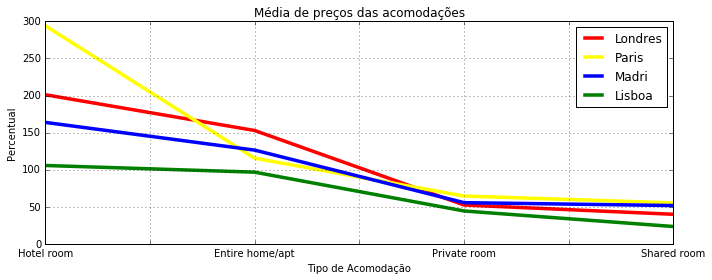

In [101]:
# Criar um gráfico com os dados dos Preços Médios das acomodações nas cidades
fig, ax = plt.subplots(figsize=(10,4))
(df_uk.groupby(['room_type']).price.mean().sort_values(ascending=False)).plot(kind="line",ax=ax,
                                                                              label='Londres', linewidth=3.5, color="red")
(df_fr.groupby(['room_type']).price.mean().sort_values(ascending=False)).plot(kind="line",ax=ax,
                                                                              label='Paris', linewidth=3.5, color="yellow")
(df_es.groupby(['room_type']).price.mean().sort_values(ascending=False)).plot(kind="line",ax=ax,
                                                                              label='Madri', linewidth=3.5, color="blue")
(df_pt.groupby(['room_type']).price.mean().sort_values(ascending=False)).plot(kind="line",ax=ax,
                                                                              label='Lisboa', linewidth=3.5, color="green")

ax.set_title("Média de preços das acomodações")
ax.set_xlabel('Tipo de Acomodação')
ax.set_ylabel('Percentual')
ax.legend(loc='upper right')

ax.grid();
plt.tight_layout()

# **Q4. Quais os valores médios das acomodações nas Cidades?**
O gráfico acima nos responde uma série de questões:

1. Quartos Compartilhados são os mais baratos em todas as Cidades;
2. Lisboa é a Cidade mais barata em todos os tipos de acomodações;
3. Paris tem o Quarto de Hotel mais caro de todas as Cidades;
4. Londres tem os Imóveis mais caros dentre todas as Cidades;
5. Quartos privados é a modalidade que tem os preços mais próximos dentre todas as Cidades;


## Resumo dos dados e tomada de decisão 
Diante das informações demonstradas, a acomodação Apartamento/Casa em Londres tem o preço médio mais caro do comparativo das Cidades. Diante dessa informação, vamos então ver a localização das que tem mais avaliações por mês, na Cidade de Londres.

In [0]:
# Deixar no DataFrame apenas as Casas/Apartamentos
df_londres = df_londres[df_londres.room_type == 'Entire home/apt']

In [85]:
# Filtrar somente as acomodações que tenham a média superior a 1.50% de Reviews por mês
media_neighbourhood = df_londres.groupby('neighbourhood').mean()
nomes_neighbourhood = media_neighbourhood[media_neighbourhood.reviews_per_month >= 1.50].index
print(nomes_neighbourhood)
df_londres_review = df_londres[df_londres['neighbourhood'].isin(nomes_neighbourhood)]
df_londres_review.tail(5)

Index(['Hillingdon'], dtype='object', name='neighbourhood')


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
80766,38945404,Heathrow Airport Apartments (Peymans) ♣TOP♣,22533556,Peymans,Hillingdon,51.48114,-0.42856,Entire home/apt,100,1,4,2019-11-01,4.0,10,12
80768,38945617,Heathrow Airport Apartments (Peymans)•••PREMIU...,22533556,Peymans,Hillingdon,51.48257,-0.42942,Entire home/apt,100,1,3,2019-10-27,3.0,10,27
80769,38945689,Heathrow Airport Apartments (Peymans) ⭐️UNIQUE⭐️,22533556,Peymans,Hillingdon,51.48078,-0.42952,Entire home/apt,100,1,2,2019-10-26,2.0,10,30
82611,39338288,Quiet and local to shopping centre.,283389483,Mustafa,Hillingdon,51.54494,-0.47181,Entire home/apt,100,1,1,2019-10-20,1.0,1,173
82800,39381218,STUDIO NEAR HEATHROW WITH FREE PARKING,61200912,William,Hillingdon,51.51101,-0.47586,Entire home/apt,50,1,1,2019-10-29,1.0,1,6


Após executar a filtragem dos dados deixando somente as acomodações inteiras. Pegamos a média de todos os bairros e comparamos o percentual de Avaliações Mensais, então iremos apresentar somente as propriedades que tem em média 1,5% de avaliações mensais(as maiores médias dos dados).

In [0]:
# Criar um mapa com as marcações das acomodações
latitude = df_londres_review.latitude.values
longitude = df_londres_review.longitude.values
nomes = df_londres_review.name.values

# criar um mapa
mapa = folium.Map(location=[51.5116722,-0.408801],
                  zoom_start=12, )
# adicionar pontos (markers) ao mapa
for lat, lon in zip(latitude, longitude):
  folium.Marker(
                location=[lat,lon],
                icon=folium.Icon(icon_color='yellow')
              ).add_to(mapa)
marker = folium.CircleMarker(location=[list(zip(latitude, longitude))])
marker.add_to(mapa)
# exibir mapa final com os pontos
mapa

Mostrar num mapa de calor, o bairro onde a média dos preço das acomodações é superior a **220 £**

In [100]:
# Filtrar somente as acomodações que tenham a média superior a 1.50% de Reviews por mês
media_neighbourhood = df_londres.groupby('neighbourhood').mean()
nomes_neighbourhood = media_neighbourhood[media_neighbourhood.price >=220].index
print(nomes_neighbourhood)
df_londres_review = df_londres[df_londres['neighbourhood'].isin(nomes_neighbourhood)]
# O bairro mais caro em média é: Westminster

Index(['Westminster'], dtype='object', name='neighbourhood')


In [99]:
# Criar um mapa de calor com as acomidações 
latitude = df_londres_review.latitude.values
longitude = df_londres_review.longitude.values
nomes = df_londres_review.name.values

# criar um mapa
mapa = folium.Map(location=[51.51662,-0.17332],
                  zoom_start=12, )

HeatMap(list(zip(latitude, longitude))).add_to(mapa)

mapa


# **Conclusão**

Usando como base a Ciência de dados e aplicando em uma base aberta do AirBnb, podemos ter várias conclusões e podemos ter uma visão ampla de determinados aspectos, como por exemplo que a Cidade de Lisboa, dentre as analisadas é a que tem preços mais atrativos e que París é a Cidade que tem os Quartos de Hotel mais caro dentre as cidades comparadas.
No que tange ao Brexit, não sabemos o futuro, mas a percepção é que Londres é uma Cidade cara, o que se confirmou no Gráfico comparativo, perdendo somente no quesito Quarto de Hotel para Paris.

Espero ter demonstrado um pouco da Ciência de Dados aplicada no dia a dia.